In [1]:
import cv2
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
#reading images:
img1_bgr = cv2.imread('Data/dog_backpack.jpg')
img1 = cv2.cvtColor(img1_bgr, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('Data/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

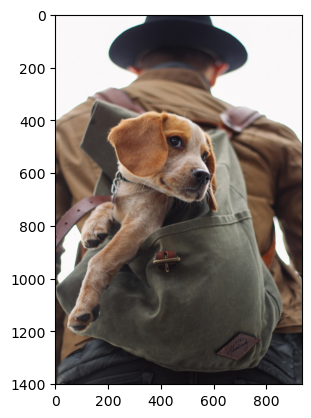

In [3]:
plt.imshow(img1)
plt.show()

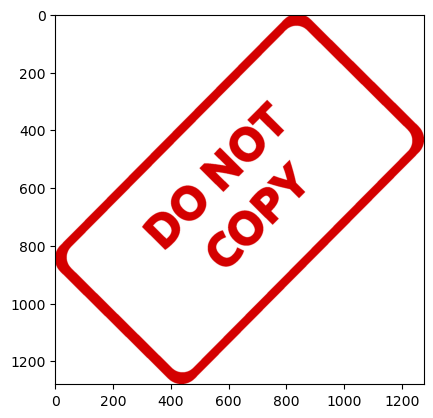

In [4]:
plt.imshow(img2)
plt.show()

In [5]:
img1.shape

(1401, 934, 3)

In [6]:
img2.shape

(1280, 1277, 3)

In [7]:
#not equal size

#To do in simple way - can make to equal size. (this can distort image)

#blending images:(of same size)
img1 = cv2.resize(img1, (1200,1200))
img2 = cv2.resize(img2, (1200,1200))



In [8]:
img1.shape

(1200, 1200, 3)

In [9]:
img2.shape

(1200, 1200, 3)

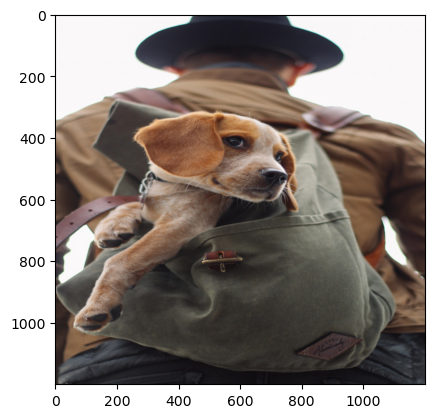

In [10]:
plt.imshow(img1)
plt.show()

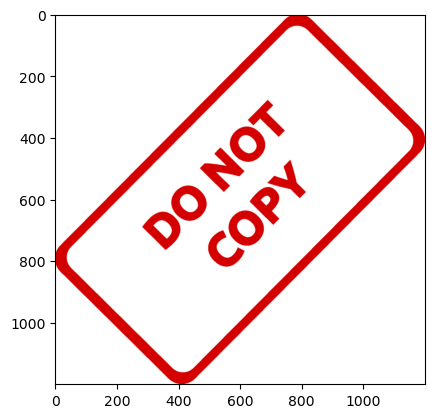

In [11]:
plt.imshow(img2)
plt.show()

## BLENDING IMAGES OF SAME SIZE:

In [12]:
#now blending:(using addWeighted)

blended_img = cv2.addWeighted(src1=img1, alpha=0.5, src2=img2, beta=0.5, gamma=0)
#so blending image 50% of each image



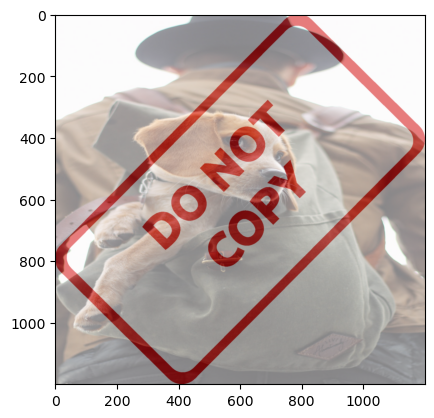

In [13]:
plt.imshow(blended_img)
plt.show()

In [14]:
#To make one image shine brighter - by increasing alpha and beta values.

#This is for images of same size.


## BLENDING & OVERLAYING IMAGES OF DIFF SIZE:

### OVERLAYING IMAGES:

In [15]:
#overlaying - just replacing a part of large image with small image(can't see the beneath part)

#addWeighted - only works for images of same size.

img2 = cv2.resize(img2,(600,600))


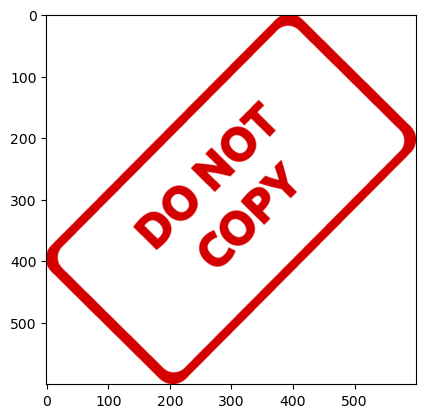

In [16]:
plt.imshow(img2)
plt.show()

In [17]:
large_img = img1.copy()
small_img = img2.copy()

#chunk of large image replaced by small image.

#markers to start overlay:
x_offset = 0
y_offset = 0

#intially at 0

#end markers:

x_end = x_offset+small_img.shape[1]
y_end = y_offset+small_img.shape[0] #in diagram y is horizontal and x is vertical



In [18]:
x_end

600

In [19]:
y_end

600

In [20]:
#now overlaying it(using slicing)
#replacing pixels

large_img[y_offset:y_end, x_offset:x_end] = small_img

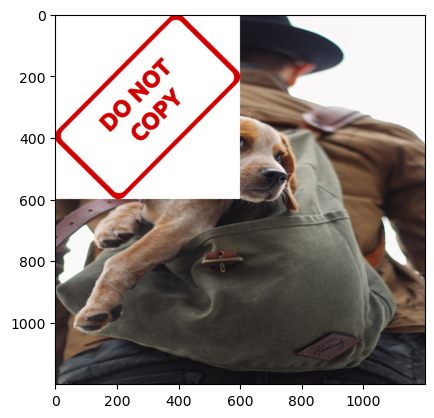

In [21]:
plt.imshow(large_img)
plt.show()

### BLENDING IMAGES OF DIFF SIZES

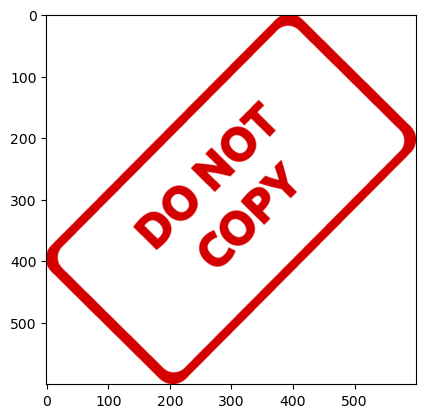

In [22]:
#done by building mask and then pasting it

plt.imshow(img2)
plt.show()

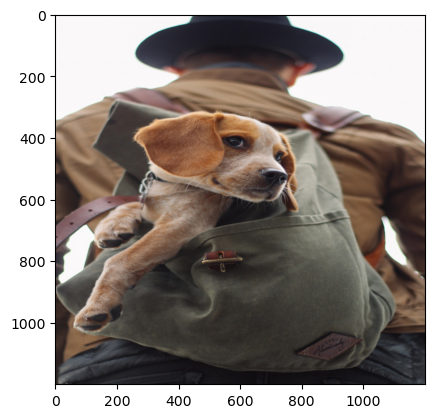

In [23]:
plt.imshow(img1)
plt.show()

In [24]:
img1.shape

(1200, 1200, 3)

In [25]:
img2.shape

(600, 600, 3)

In [26]:
#ROI(region of interest) - to place the smaller image on lareger image(part to place)

#start of roi(top left corner)
x_offset = img1.shape[1]-img2.shape[1] #starting x-offset where it can fit the image
y_offset = img1.shape[0]-img2.shape[0] #starting y_offset where it fits

In [27]:
(x_offset, y_offset)

(600, 600)

In [28]:
#roi size is same as smaller image size

In [29]:
rows, columns, channels = img2.shape
#by tuple unpacking

In [30]:
(rows, columns, channels)

(600, 600, 3)

In [31]:
#grabing ROI:

roi = img1[y_offset:img1.shape[0], x_offset:img1.shape[1]]

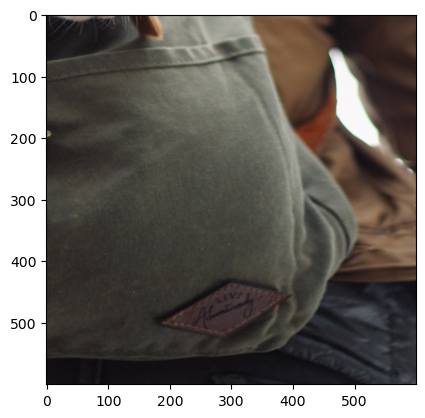

In [32]:
plt.imshow(roi)
plt.show()

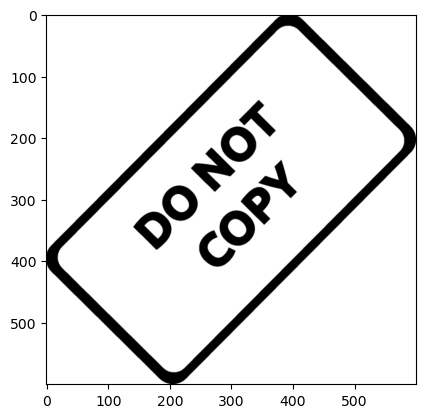

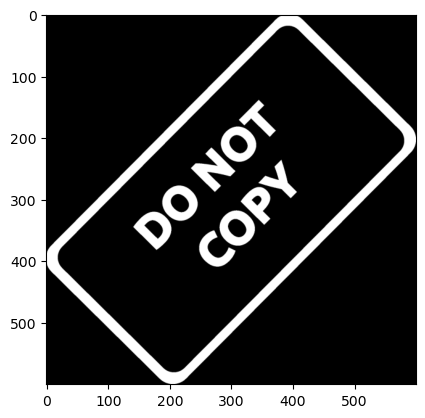

In [33]:
#this part is getting replaced or masked by smaller image

#Creating Mask: (allows to only grab red portion)

img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

plt.imshow(img2gray, cmap='gray') #default map is virdis
plt.show()

#inversing the image -as this gives black color(blocking red material)
#so need to convert to white

#inverse:
mask_inv = cv2.bitwise_not(img2gray)
#this calculates per element bitwise inversion

plt.imshow(mask_inv, cmap='gray') #default map is virdis
plt.show()


In [34]:
#now mask is ready as red portion is not blocked by black ( red is allowed to shine through white here)

mask_inv.shape

(600, 600)

In [35]:
#no color channels as it is gray image

#now to add color channels:

import numpy as np

white_background = np.full(img2.shape, 255, dtype=np.uint8)

#same shape as small image creating a white background
white_background.shape

(600, 600, 3)

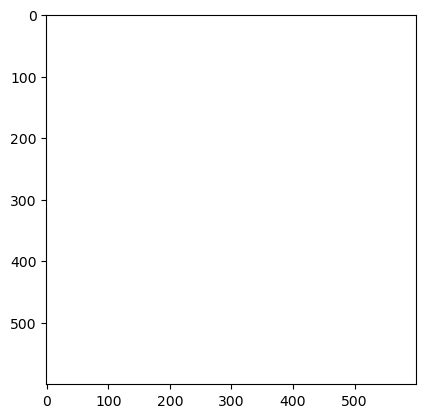

In [36]:
plt.imshow(white_background) #default map is virdis
plt.show()


In [37]:
#grabbing red material and also white background
#bitwise or calculates perelement bitwise disjunction(intersection) of 2 arrays

#two source and mask
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)

bk.shape

(600, 600, 3)

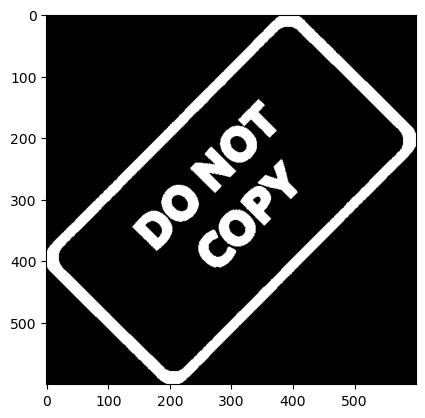

In [38]:
plt.imshow(bk) #default map is virdis
plt.show()


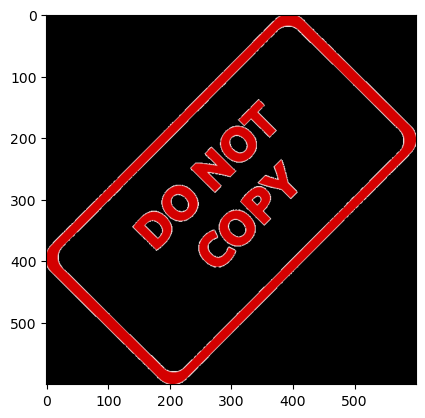

In [39]:
#now converted to color channel as well.(same figure across 3 color channels)

#grabbing originak img(smaller original) and placing it on top of mask

fg = cv2.bitwise_or(img2, img2, mask=mask_inv)

plt.imshow(fg) #default map is virdis
plt.show()

#this highlightes or gives only that is in white. (anything with is only allowed to shine through)



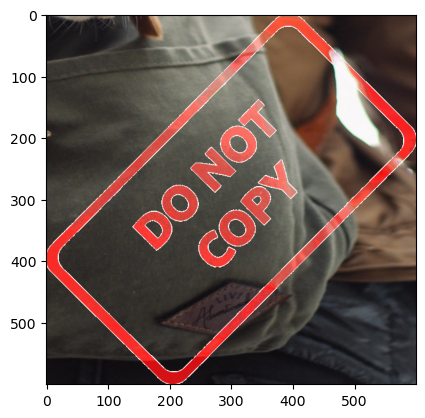

In [40]:
#ROI and Blending mask:

#roi is the part of large image to be replaced.
final_roi = cv2.bitwise_or(roi, fg)

plt.imshow(final_roi) #default map is virdis
plt.show()


In [41]:
#now replacing roi pixels to large image

large_img = img1
small_img = final_roi


large_img[y_offset:y_offset+small_img.shape[0],x_offset:x_offset+small_img.shape[1]]=small_img

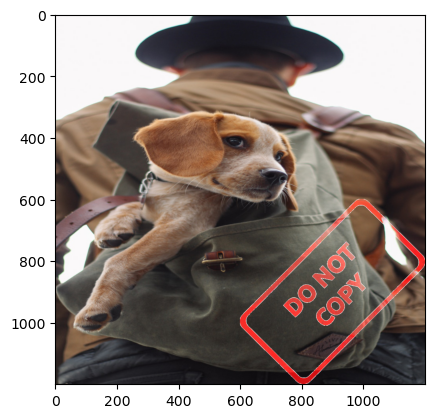

In [42]:
plt.imshow(large_img) #default map is virdis
plt.show()

In [43]:
#this is how water marks are made.